In [17]:
from joblib import Parallel, delayed

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


# simulation and Loglikelihood NHP

0.7333333333333247
2200.0553688637156
3467.040822434893


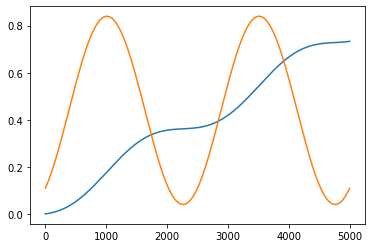

In [23]:
ker=5
#exponential
a=0.5
b=0.001

run_time = 5000
#sin curve
a=(0.0004)
b=1000
c=1.1
d=0.4

#parabola
#a=0.0002*1e-3
#b=2000
#c=1.5


def mufunction(x):
    x=(np.array(x)).reshape(-1)
    if ker==0:
        mu=a*np.exp(-b*x)
    elif ker==1:
        mu=a*(c*x-b)**2
    elif ker==2:
        mu=a*np.ones(len(x))
    else:
        mu=d*(np.sin(a*2*np.pi*x-b)+c)
    
    
    return mu




T = np.arange(0,run_time,0.01)
Y=mufunction(T)
int_Y=np.cumsum(Y*0.01/3000)
print(int_Y[-1])
plt.plot(T,int_Y)

#f = TimeFunction((T, Y), dt=0.01)

# We define a 1 dimensional inhomogeneous Poisson process with the
# intensity function seen above
#n_poi = SimuInhomogeneousPoisson([tf], end_time=run_time, verbose=False)

# We activate intensity tracking and launch simulation
#in_poi.track_intensity(0.1)
#in_poi.simulate()

# We plot the resulting inhomogeneous Poisson process with its
# intensity and its ticks over time
#t=in_poi.timestamps[0]
#tseries1=np.insert(t,0,0)

        

#likelihood
def likelihoodMu(x):
    if ker==0:
        integratedMu=a*(1-np.exp(-b*x[-1]))/b
    elif ker==1:
        integratedMu=a/(3*c)*((c*x[-1]-b)**3-(c*x[0]-b)**3)
    elif ker ==2:
        integratedMu=a*(x[-1]-x[0])
    else:
        y1=d*(-np.cos(a*2*np.pi*x[-1]-b)/(np.pi*2*a)+c*x[-1])
        y2=d*(-np.cos((a*2*np.pi*x[0]-b))/(2*a*np.pi)+c*x[0])
        integratedMu=y1-y2
    print(integratedMu)    
    logKernel=(np.log(mufunction(x))).sum()
    likelihood=(integratedMu).sum()-logKernel
    return likelihood


def nonHomogenousSimulation(T):
    time_intervals=[]
    s=0
    lambdas=mufunction(np.arange(0,T,0.1))
 
    max_lambda=max(lambdas)
    time_intervals.append(s)
    while(s<T):
        prob=np.random.uniform(0,1,1)[0]
        interArriT=-np.log(prob)/max_lambda
        s=s+interArriT
        lambdas=mufunction(s)
        prob_thin=np.random.uniform(0,1,1)[0]
        if(prob_thin*max_lambda<=lambdas):
            time_intervals.append(s)
    return np.array(time_intervals)
tseriesnew=nonHomogenousSimulation(run_time)
lambda_value=mufunction(tseriesnew)

plt.plot(tseriesnew,lambda_value)
print(likelihoodMu(tseriesnew))


In [24]:

def gradientMus1(iArray):
    alphas=mus1[0]
    alpha0=mus1[1]
    betas=mus2[0]
    beta0=mus2[1]
    c=musC[0]
    gradA=np.zeros((len(alphas),1))*0
    gradB=np.zeros((len(alphas),1))*0
    gradB0=np.zeros((len(alphas),1))*0
    gradA0=0
    gradC=0
    preIntGradients()


    
    for j in np.nditer(iArray):
        tj=tseries[j]
        if tj>0.0000000:
            iP=tseries[j-1]
            IntegratMu1=gradientMusPart(tj)
            IntegratMu2=gradientMusPart(iP)
            gradA=gradA+(IntegratMu1[0]-IntegratMu2[0])
            gradA0=gradA0+(IntegratMu1[1]-IntegratMu2[1])
            gradB=gradB+(IntegratMu1[2]-IntegratMu2[2])
            gradB0=gradB0+(IntegratMu1[3]-IntegratMu2[3])
            gradC=gradC+(IntegratMu1[4]-IntegratMu2[4])
            logpart=((nnMufunction(tj)).sum())
            
            inverselog=1/logpart
            n1=np.maximum(betas*(tj)+beta0,0)
            dn1=(n1>0)
            term1=(alphas*n1).sum()+alpha0
            dn2=(term1>0)
            
            gradA=gradA-(n1)*dn2*inverselog
            gradA0=gradA0-(1)*dn2*inverselog
            gradB=gradB-(alphas*tj*dn1)*dn2*inverselog
            gradB0=gradB0-(alphas*dn1)*dn2*inverselog
            gradC=gradC-(1)*inverselog
    length=len(iArray)
    
    gradA,gradA0,gradB,gradB0=gradA/length,gradA0/length,gradB/length,gradB0/length
    mus1grad[0]=gradA
    mus1grad[1]=gradA0
    mus2grad[0]=gradB
    mus2grad[1]=gradB0
    musCgrad[0]=gradC
    return
            
    
def gradientMusPart(x):
    alphas=mus1[0]
    alpha0=mus1[1]
    betas=mus2[0]
    beta0=mus2[1]
    c=musC[0]
    gradA=np.zeros((len(alphas),1))*0
    gradB=np.zeros((len(alphas),1))*0
    gradB0=np.zeros((len(alphas),1))*0
    gradA0=0
    gradC=0
    inflectionPs=dictMus['inflection']
 
    
    tj=x
    iP=(max(inflectionPs[inflectionPs<=tj]))
    gradAP,gradA0P,gradBP,gradB0P,gradCP=dictgradient.get(iP)
    
    n1=betas*(tj-epsilon)+beta0
    dn1=(n1>0)
    n2=(alphas*dn1*n1).sum()+alpha0
    dn2=(n2>0)
    
    

    cn1=tj*(0.5*betas*tj+beta0)*dn1
    cn2=iP*(0.5*betas*iP+beta0)*dn1
    gradA0=gradA0+gradA0P+(tj-iP)*dn2
    gradA=gradA+gradAP+(cn1-cn2)*dn2
    gradB=gradB+gradBP+(0.5*alphas*dn1*(tj**2-iP**2))*dn2
    gradB0=gradB0+gradB0P+alphas*dn1*(tj-iP)*dn2
    gradC=gradC+gradCP+(tj-iP)

    return gradA,gradA0,gradB,gradB0,gradC
        
    
def preIntGradients():
    dictgradient.clear()
    alphas=mus1[0]
    alpha0=mus1[1]
    betas=mus2[0]
    beta0=mus2[1]
    c=musC[0]
    gradA=np.zeros((len(alphas),1))*0
    gradB=np.zeros((len(alphas),1))*0
    gradB0=np.zeros((len(alphas),1))*0
    gradA0=0
    gradC=0
   
    inflectionPs=dictMus['inflection']
  
    dictgradient[0.0]=[gradA*0,gradA0*0,gradB*0,gradB0*0,gradC*0]
    
    for j in range(1,len(inflectionPs)):
        iP1=inflectionPs[j]
        iP2=inflectionPs[j-1]
        n1=betas*(iP1-epsilon)+beta0
        dn1=(n1>0)
        n2=(alphas*dn1*n1).sum()+alpha0
        dn2=(n2>0)

        cn1=iP1*(0.5*betas*iP1+beta0)*dn1
        cn2=iP2*(0.5*betas*iP2+beta0)*dn1
        gradA0=gradA0+(iP1-iP2)*dn2
        gradA=gradA+(cn1-cn2)*dn2
        gradB=gradB+0.5*alphas*dn1*(iP1**2-iP2**2)*dn2
        gradB0=gradB0+alphas*dn1*(iP1-iP2)*dn2
        
        gradC=gradC+(iP1-iP2)
        dictgradient[iP1]=[gradA,gradA0,gradB,gradB0,gradC]
    return
        
    
    

2200.0553688637156
3467.040822434893
5000.506153930413
Intialization 



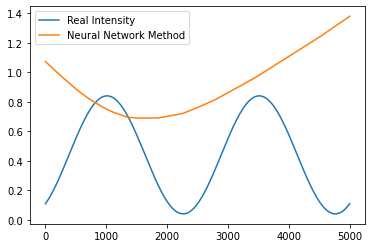

2000 0 4419.5053195811715


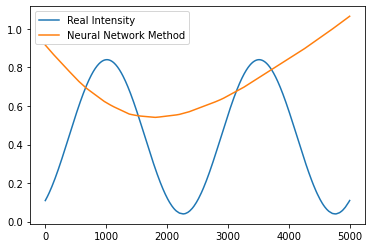

2000 1 4160.893983417537


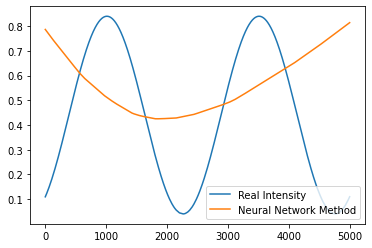

2000 2 4064.1932799227925


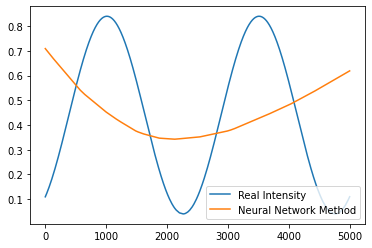

2000 3 4042.987281916503


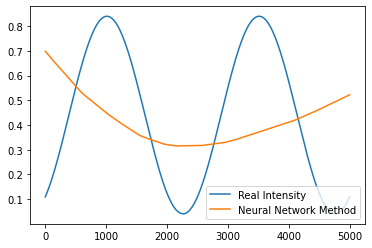

2000 4 4021.17982156713


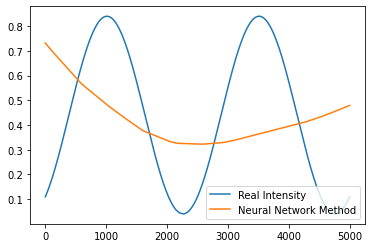

2000 5 4006.8465770012094


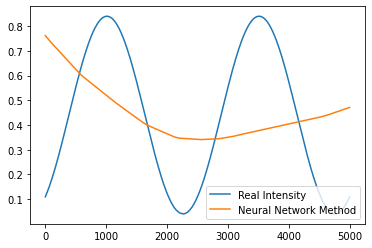

2000 6 3998.111420309183


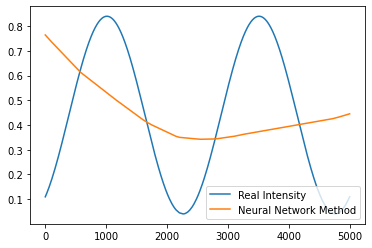

2000 7 3992.6071531852276


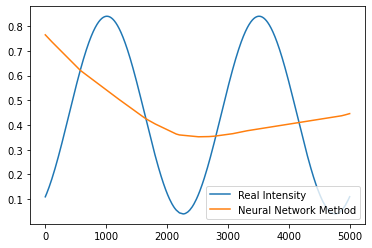

2000 8 3986.113011319886


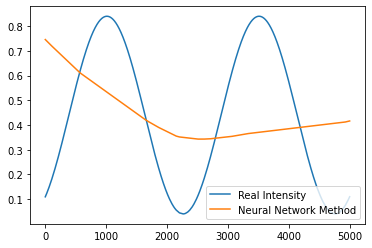

2000 9 3981.418133598749


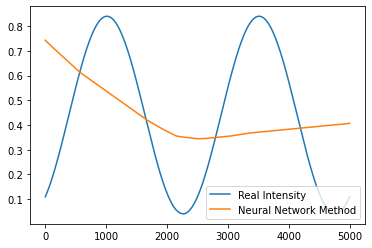

2000 10 3976.8248562291838


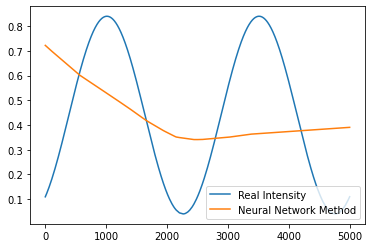

2000 11 3973.868298502936


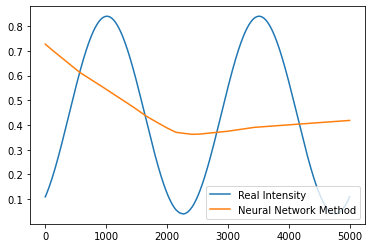

2000 12 3968.4405361340464


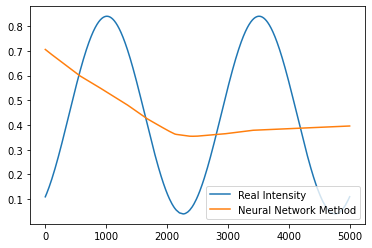

2000 13 3964.4854894251775


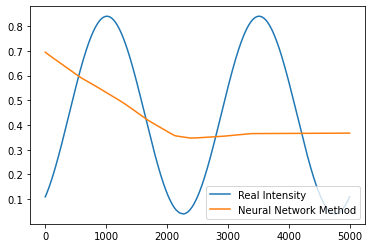

2000 14 3960.287849161437


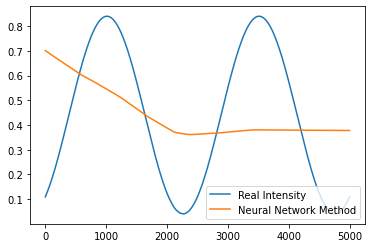

2000 15 3955.7628154275176


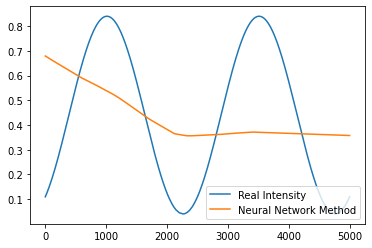

2000 16 3951.449746561732


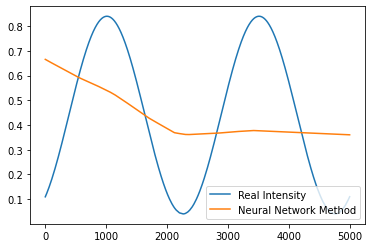

2000 17 3947.4550006205786


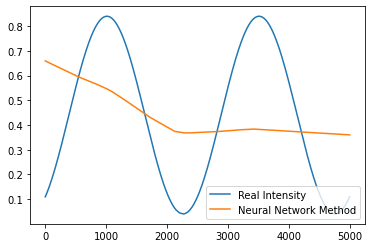

2000 18 3943.302277146062


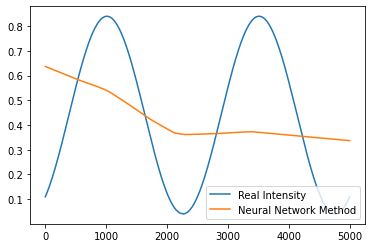

2000 19 3938.9140128537942


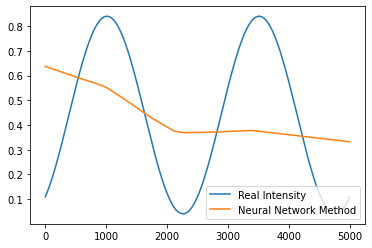

2000 20 3935.047639958338


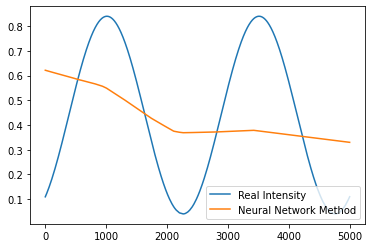

2000 21 3932.038108915144


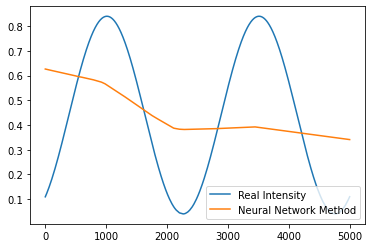

2000 22 3927.8066577886993


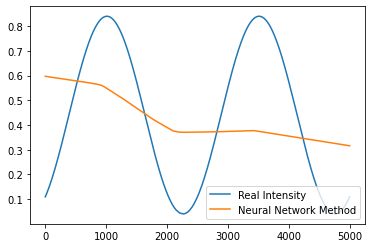

2000 23 3923.8341350730198


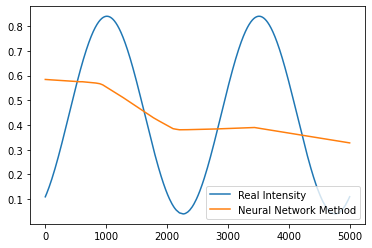

2000 24 3920.1497673409


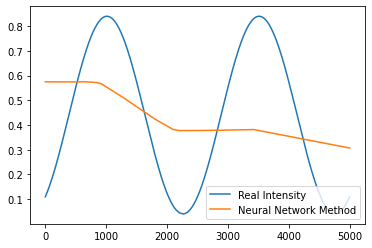

2000 25 3917.475251755225


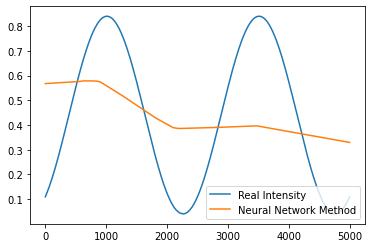

2000 26 3913.6490784590933


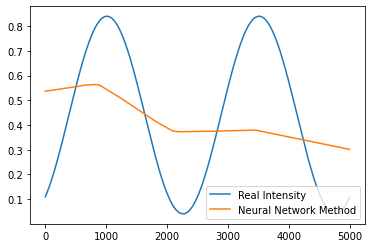

2000 27 3909.55352458897


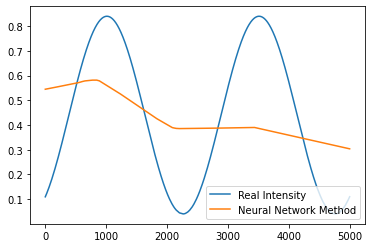

2000 28 3906.636362912089


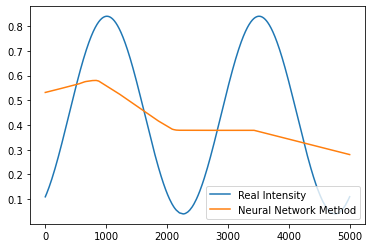

2000 29 3902.6278597851415


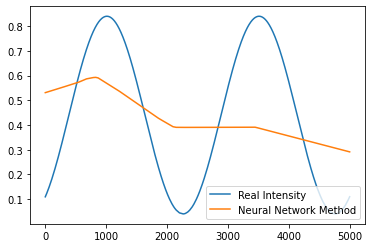

2000 30 3899.4511401753502


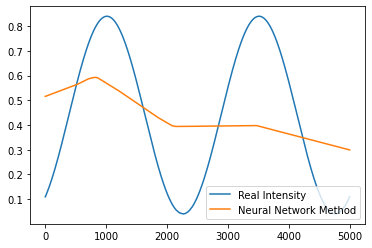

2000 31 3895.928034227196


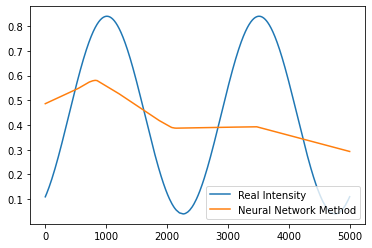

2000 32 3893.111650653344


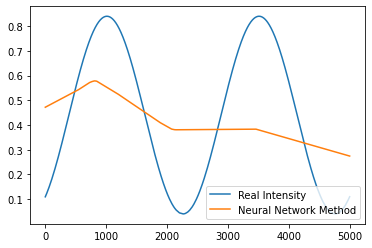

2000 33 3889.178462148657


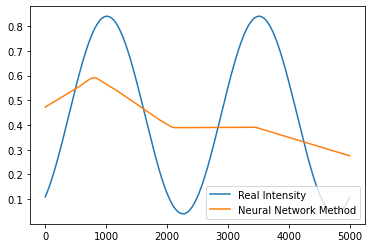

2000 34 3886.915927708605


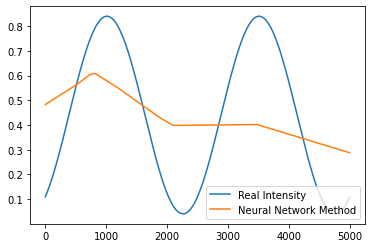

2000 35 3883.2134321656886


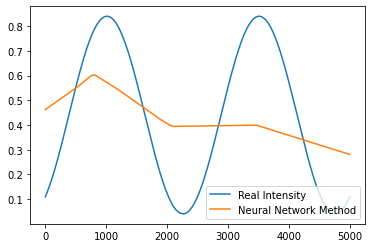

2000 36 3881.2555010655587


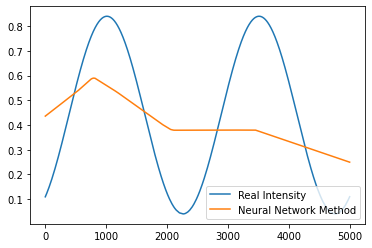

2000 37 3877.0009768439163


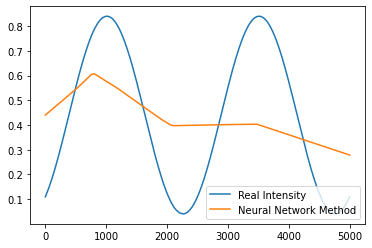

2000 38 3873.59570622076


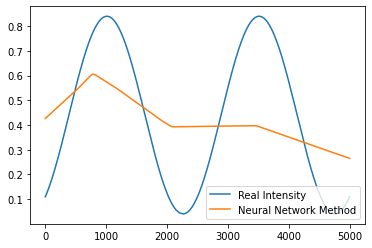

2000 39 3870.745181503504


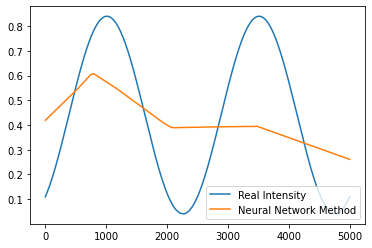

2000 40 3868.2373362387516


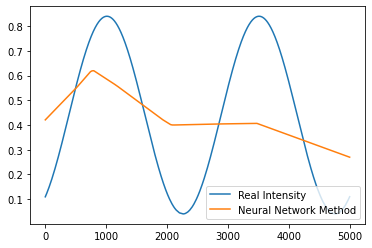

2000 41 3865.2683223030426


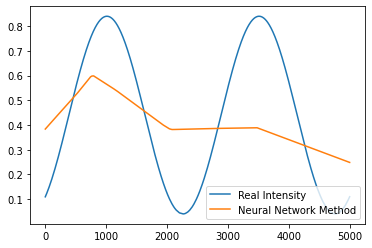

2000 42 3861.634291303483


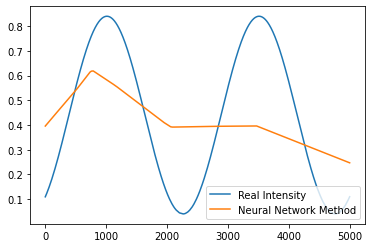

2000 43 3858.6369819118454


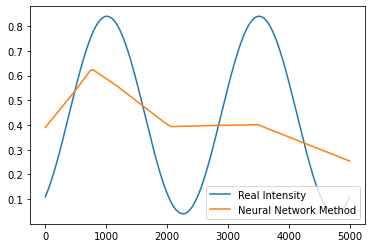

2000 44 3856.671254801541


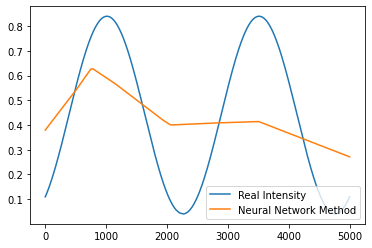

2000 45 3852.7032850909363


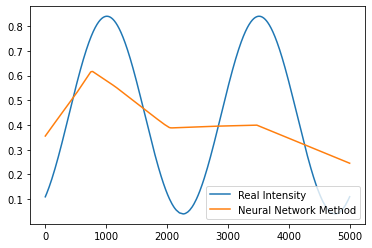

2000 46 3850.1493478403004


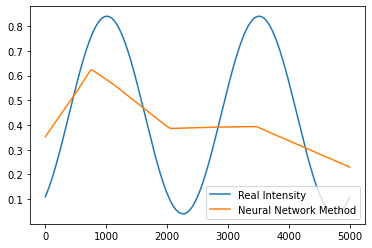

2000 47 3847.3834350114357


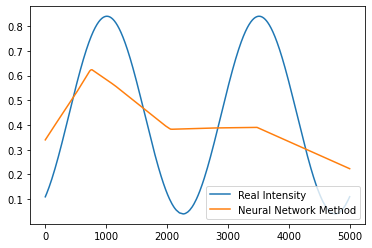

2000 48 3845.4593291216033


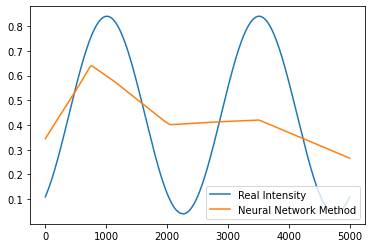

2000 49 3840.9656481561187


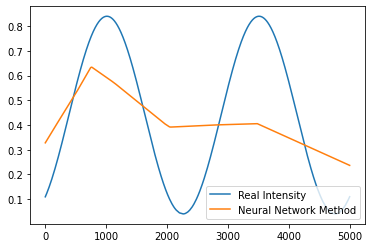

2000 50 3838.2572583923184


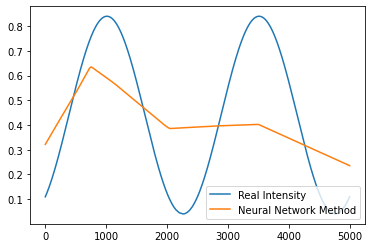

2000 51 3835.4985522380293


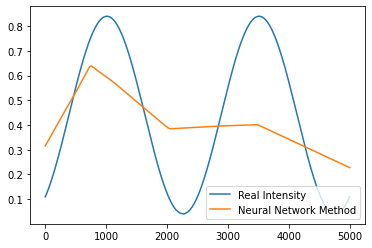

2000 52 3832.7133215603812


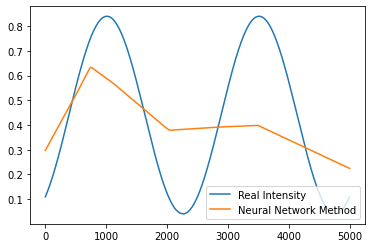

2000 53 3829.9097506395738


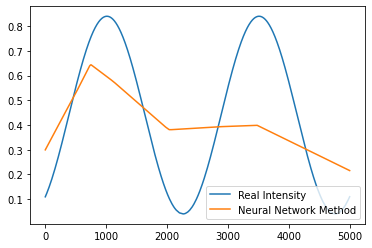

2000 54 3828.2334407499793


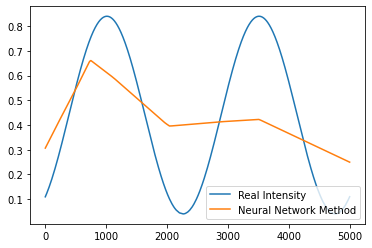

2000 55 3823.6949575122608


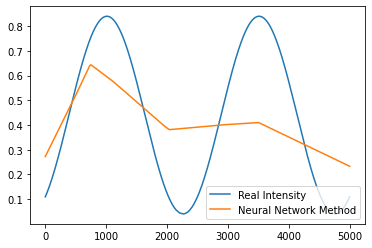

2000 56 3822.22375823682


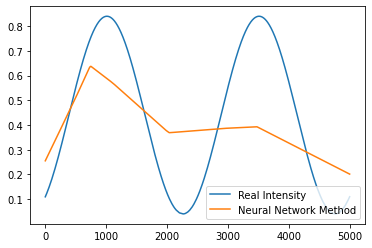

2000 57 3817.855563822697


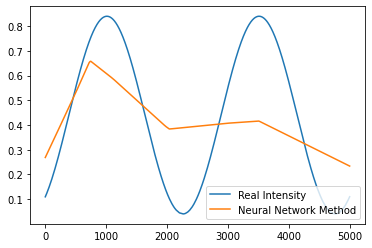

2000 58 3814.5889382308433


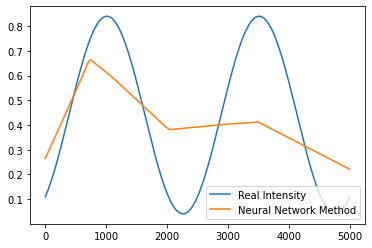

2000 59 3811.8048302974944


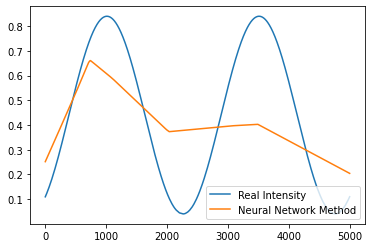

2000 60 3808.547721565205


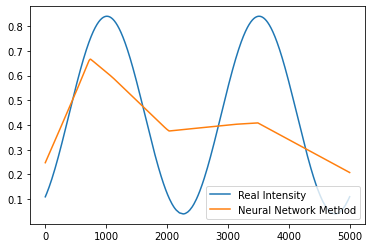

2000 61 3806.854345689202


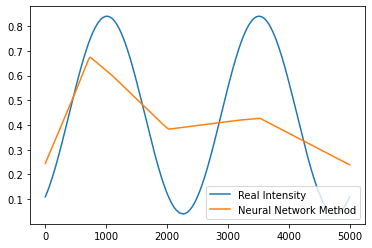

2000 62 3804.0849273544763


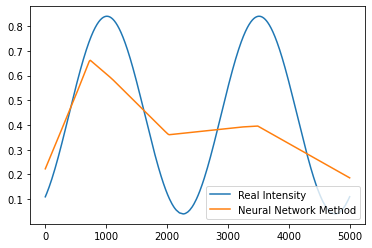

2000 63 3799.886433577908


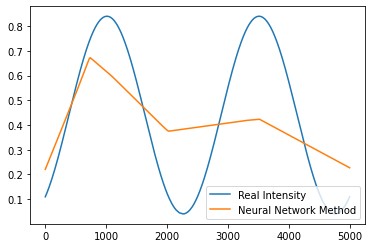

2000 64 3796.5417198836503


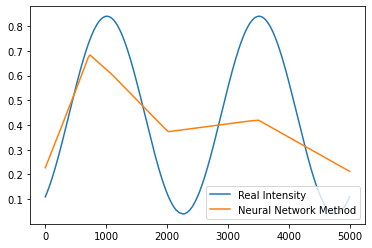

2000 65 3793.855238242088


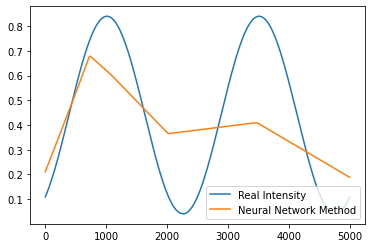

2000 66 3790.406716950538


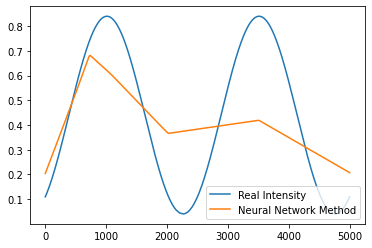

2000 67 3787.9191299209665


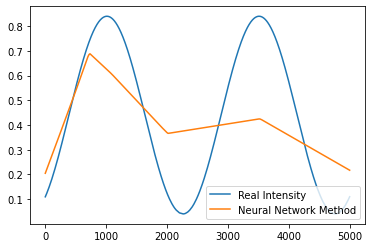

2000 68 3785.2372163465748


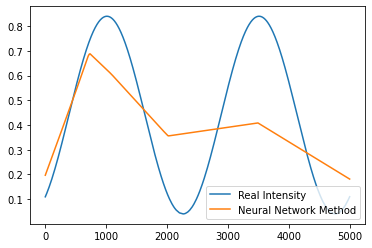

2000 69 3782.174049476131


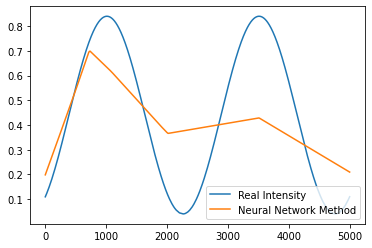

2000 70 3779.6790122122247


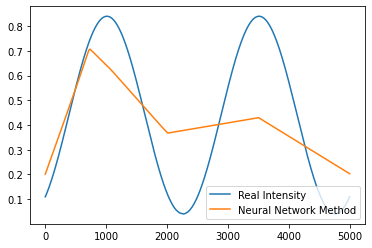

2000 71 3776.774679176782


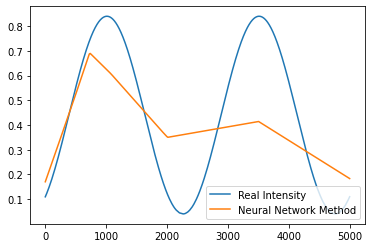

2000 72 3773.6562961733175


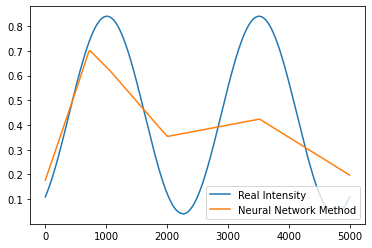

2000 73 3771.0073885420907


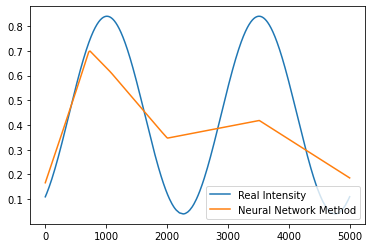

2000 74 3769.0187338949386


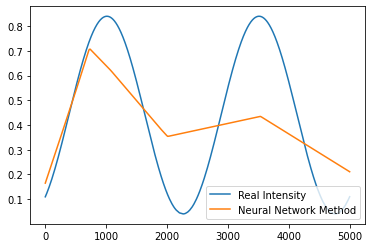

2000 75 3767.053303597417


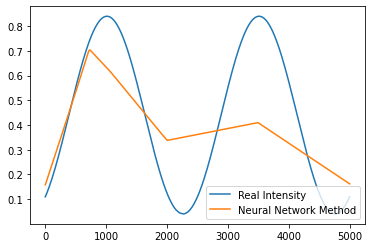

2000 76 3763.0456263070914


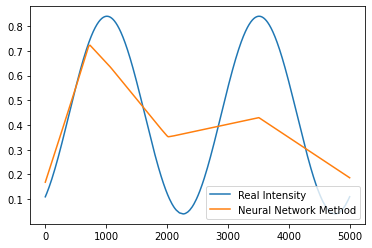

2000 77 3760.94016640838


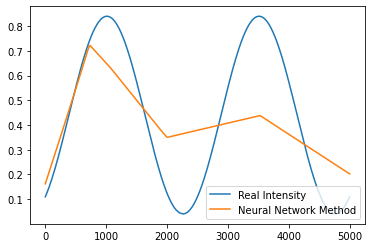

2000 78 3758.515656083275


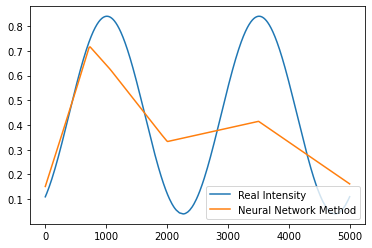

2000 79 3755.2761192467137


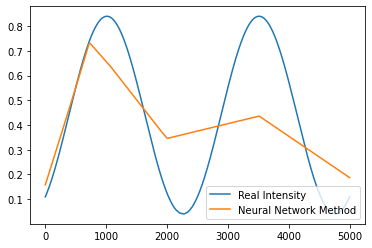

2000 80 3754.3118037428017


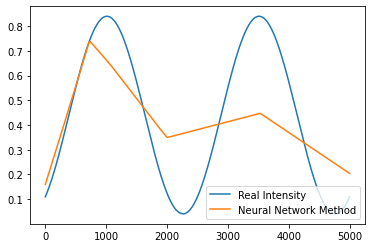

2000 81 3751.8556401940473


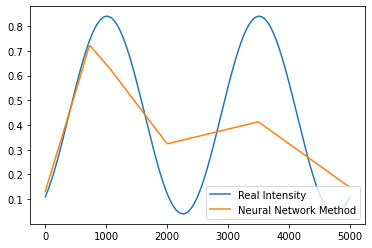

2000 82 3747.5711135149663


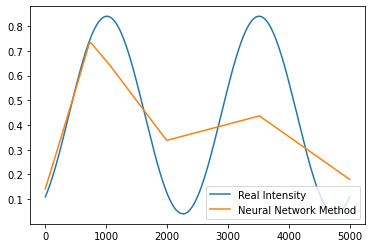

2000 83 3744.955809918444


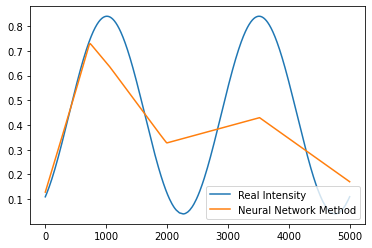

2000 84 3742.966655254358


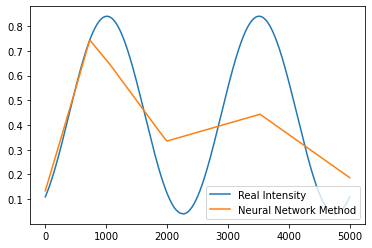

2000 85 3740.777100693207


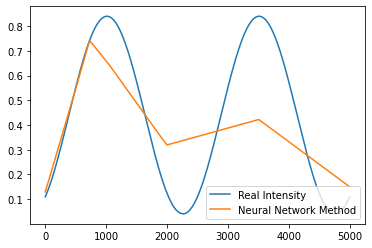

2000 86 3739.749902991431


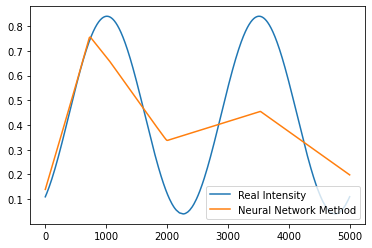

2000 87 3739.4359062303806


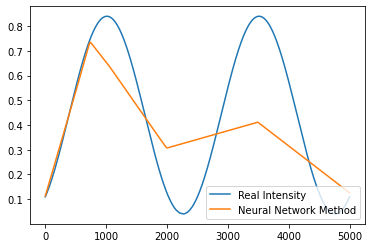

2000 88 3734.2464584350846


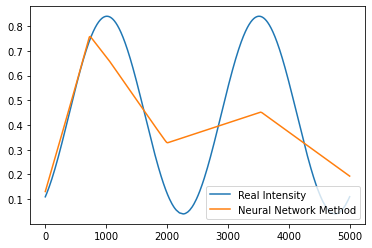

2000 89 3730.3991808596197


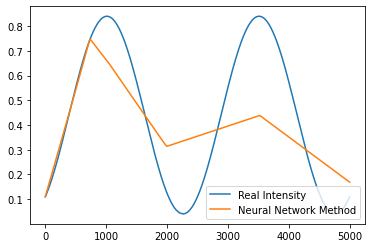

2000 90 3728.0369311661952


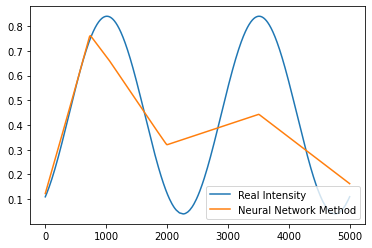

2000 91 3728.6676245024023


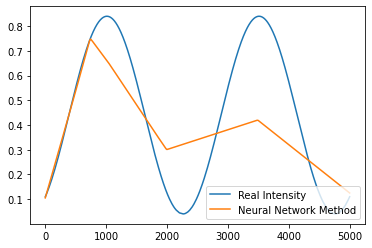

2000 92 3724.6385137221832


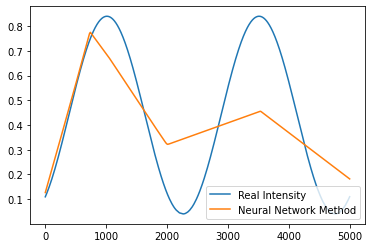

2000 93 3721.4690804170195


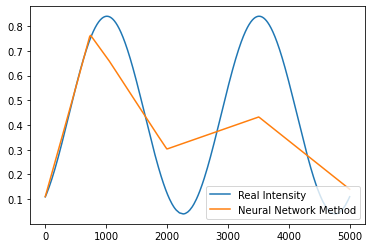

2000 94 3719.240359644703


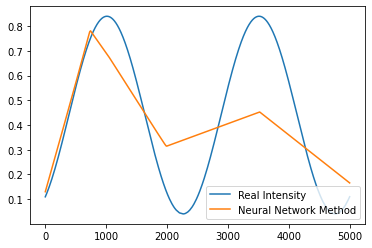

2000 95 3717.2182259256006


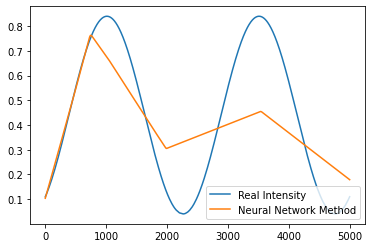

2000 96 3714.263736502061


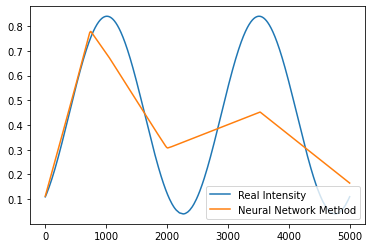

2000 97 3711.694778054454


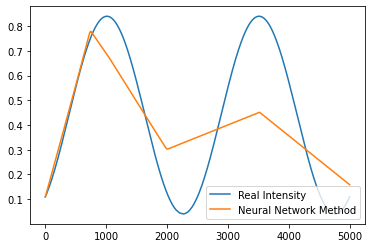

2000 98 3709.379914008214


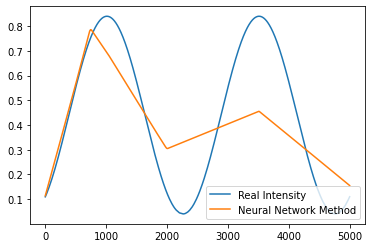

2000 99 3707.371402241018


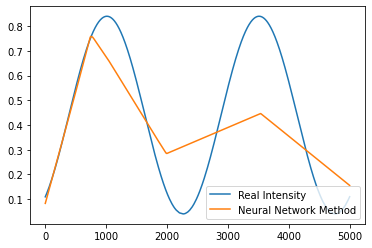

2000 100 3704.635386873789


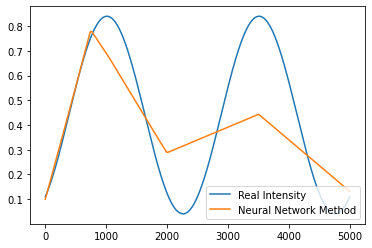

2000 101 3701.8290763333007


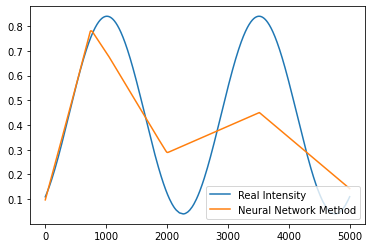

2000 102 3700.012816658437


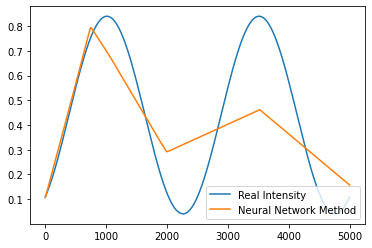

2000 103 3697.83435158998


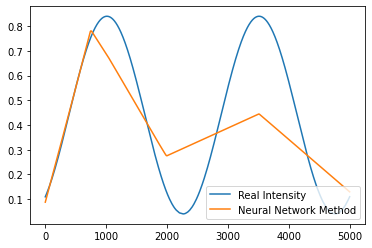

2000 104 3695.1100632865914


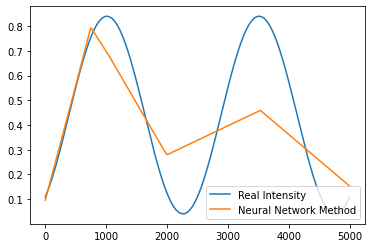

2000 105 3692.6334077740544


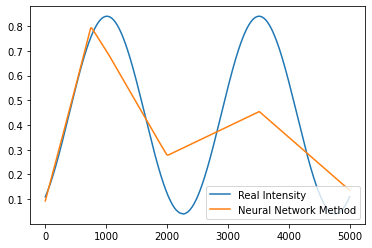

2000 106 3691.0571180599422


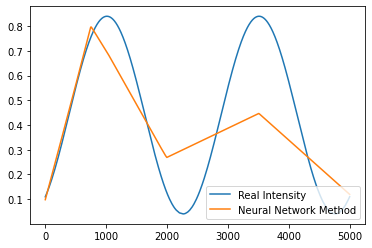

2000 107 3688.1173901359807


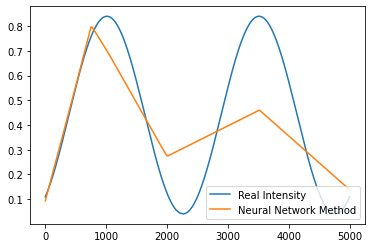

2000 108 3686.811697195617


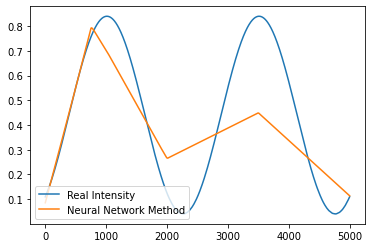

2000 109 3683.6203735208455


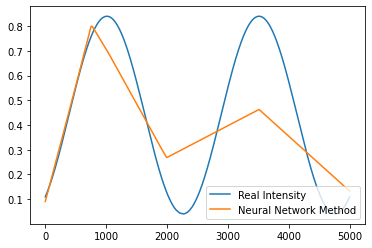

2000 110 3682.370715516909


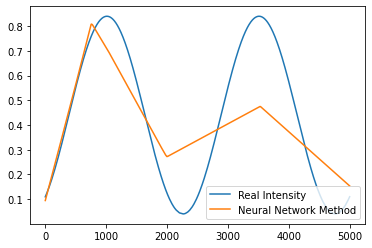

2000 111 3679.2572293277394


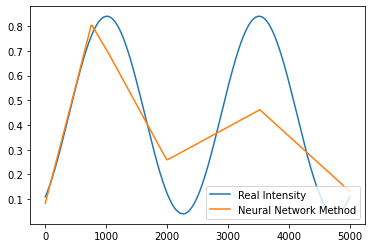

2000 112 3677.4043823506727


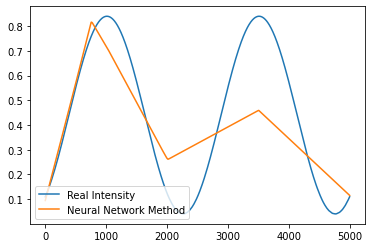

2000 113 3674.8819330652523


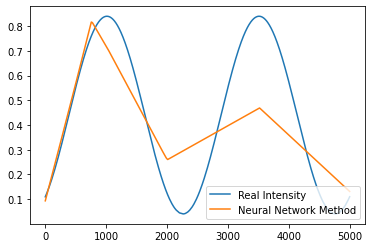

2000 114 3673.0037215622033


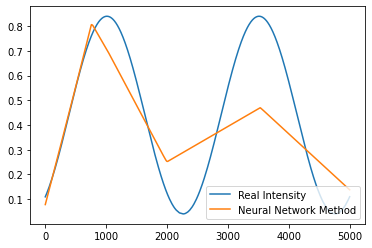

2000 115 3670.981780918879


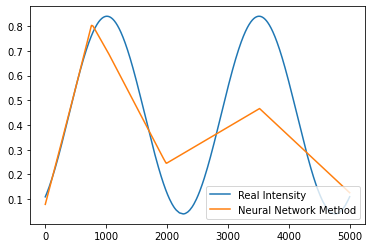

2000 116 3669.474387961893


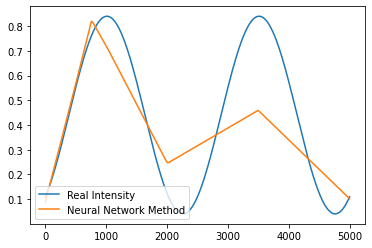

2000 117 3666.4784113088094


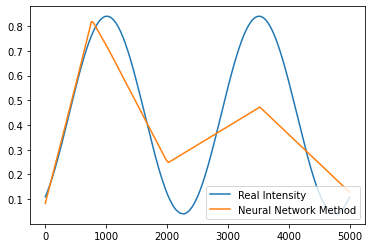

2000 118 3664.5892248206615


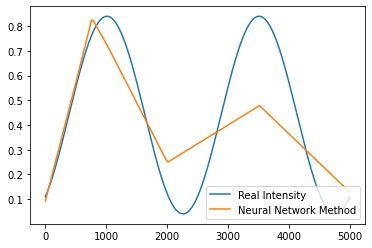

2000 119 3662.5466003707957


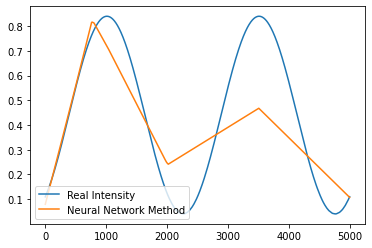

2000 120 3660.9272669688835


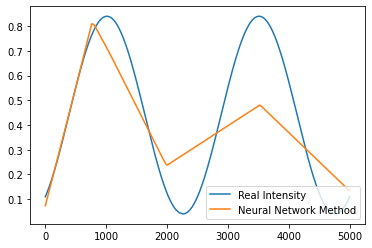

2000 121 3658.894359841377


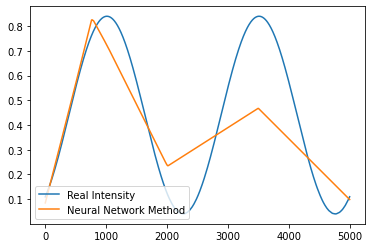

2000 122 3656.5397941943775


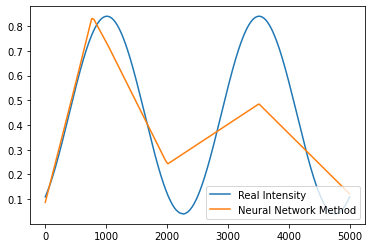

2000 123 3655.639063796512


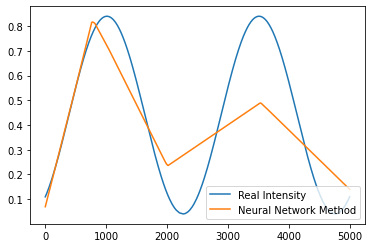

2000 124 3652.492840440661


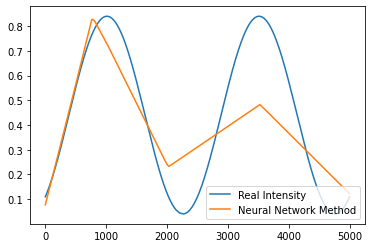

2000 125 3650.52627215624


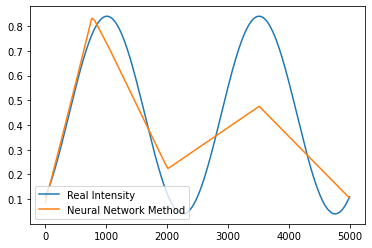

2000 126 3648.7524166945377


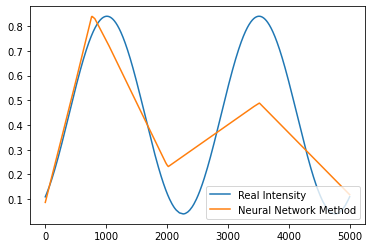

2000 127 3647.5265154181293


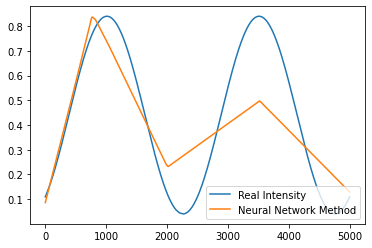

2000 128 3646.4010096610964


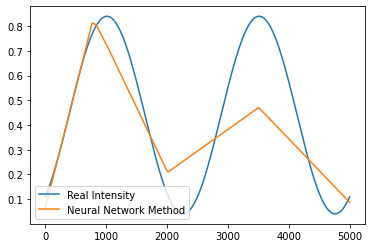

2000 129 3643.4528995893024


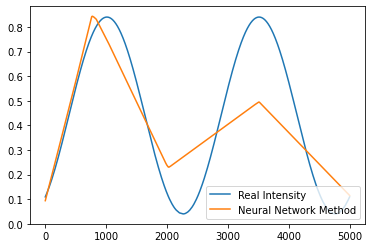

2000 130 3640.8153119482254


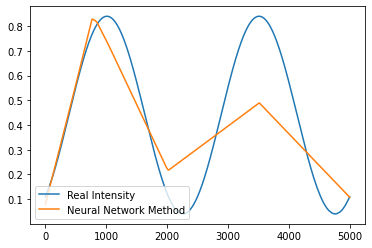

2000 131 3639.2787443120747


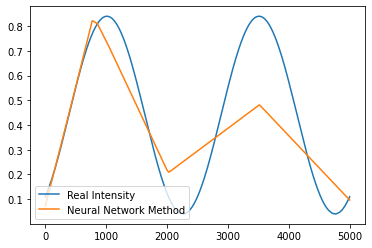

2000 132 3637.966287717487


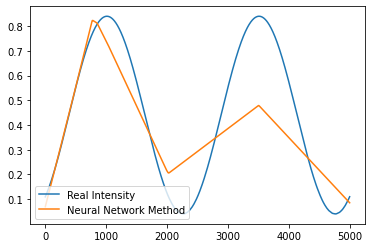

2000 133 3635.6013841664007


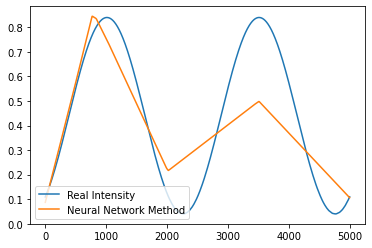

2000 134 3634.018976131668


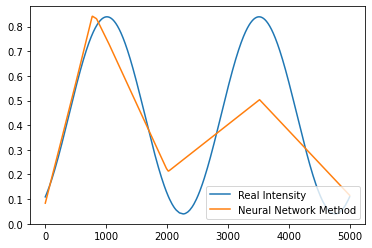

2000 135 3631.908472091024


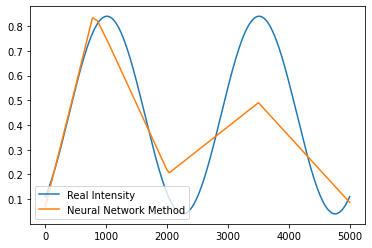

2000 136 3630.4794903154925


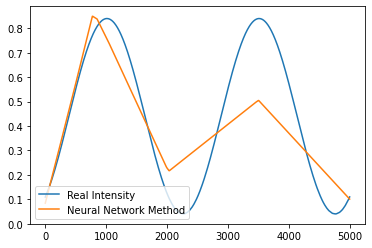

2000 137 3628.7785939041273


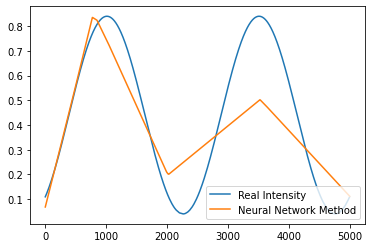

2000 138 3627.1299490838533


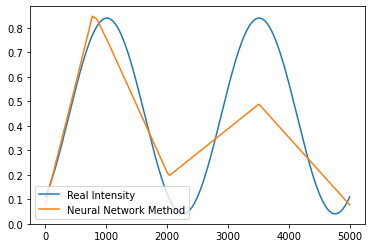

2000 139 3624.833871024182


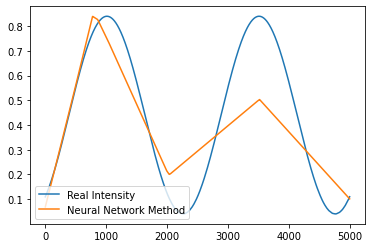

2000 140 3623.1301388324573


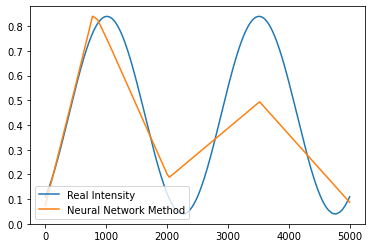

2000 141 3621.9452192988183


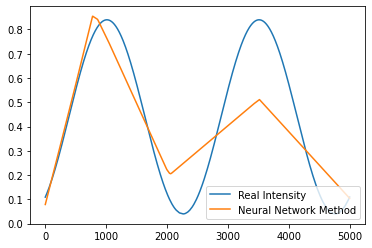

2000 142 3621.540008743554


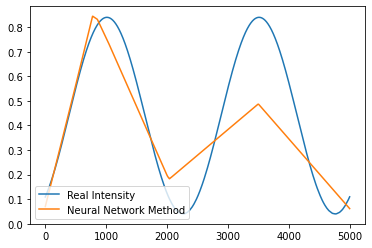

2000 143 3617.877257836735


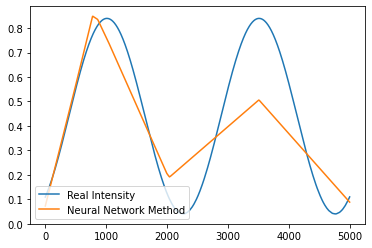

2000 144 3616.367491334246


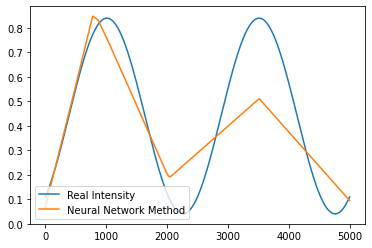

2000 145 3615.2456253850605


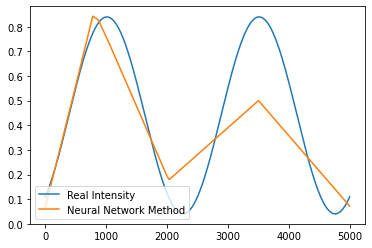

2000 146 3613.687917674016


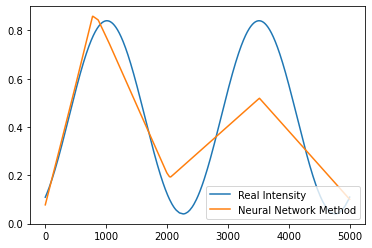

2000 147 3611.7395376838713


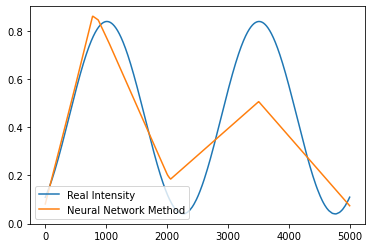

2000 148 3609.8837637813426


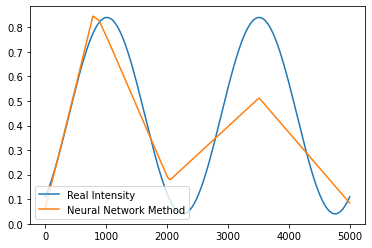

2000 149 3609.0414307452083


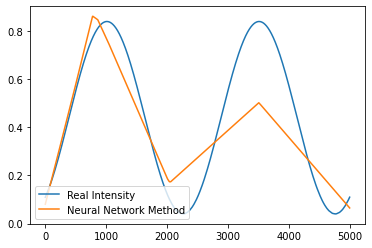

2000 150 3607.1179386721274


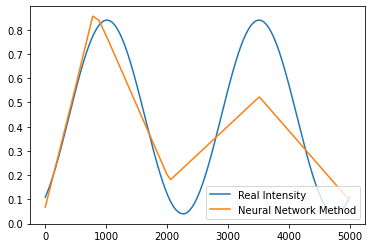

2000 151 3605.460875957696


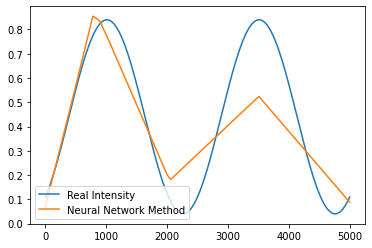

2000 152 3603.9750380310043


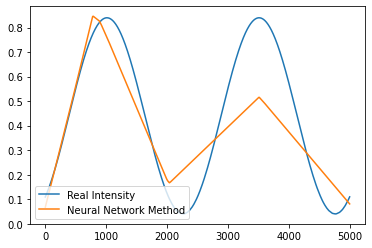

2000 153 3602.216420548956


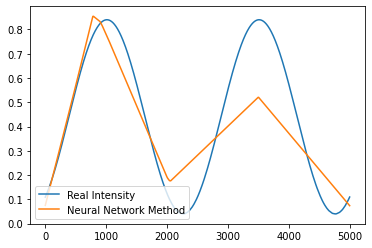

2000 154 3601.011906679028


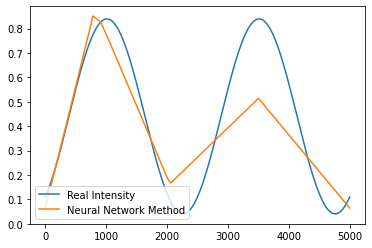

2000 155 3599.2993885590477


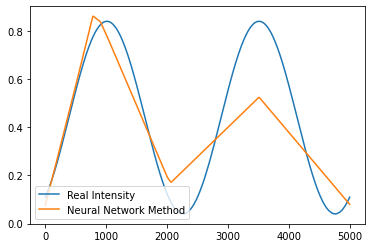

2000 156 3597.875345135842


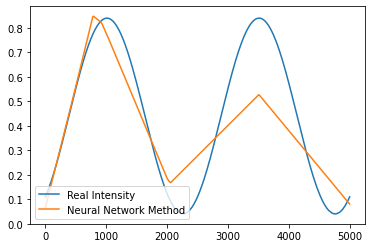

2000 157 3596.3923407992293


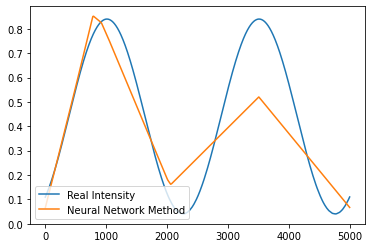

2000 158 3596.4028881710315


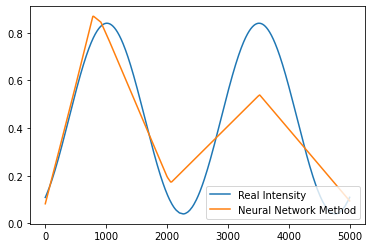

2000 159 3595.7367947803314


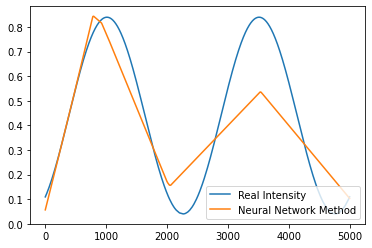

2000 160 3592.8267190784045


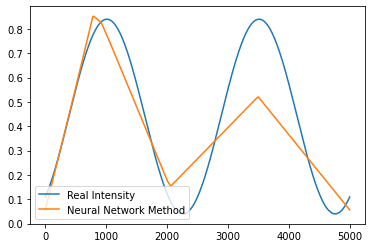

2000 161 3591.2345244153535


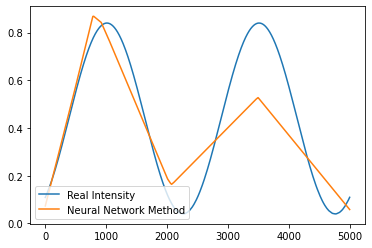

2000 162 3590.58682356221


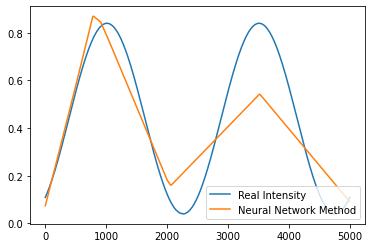

2000 163 3588.071220517378


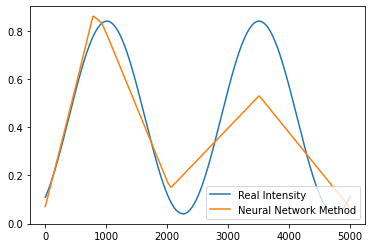

2000 164 3588.4445419485064


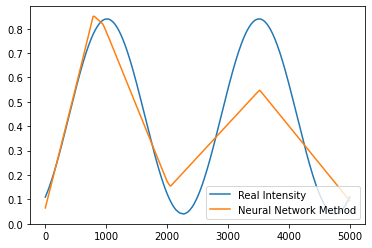

2000 165 3585.696504050202


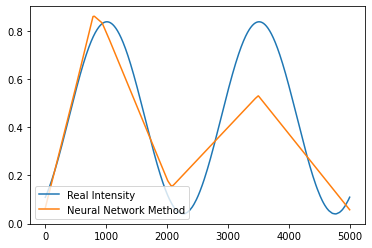

2000 166 3584.19498263779


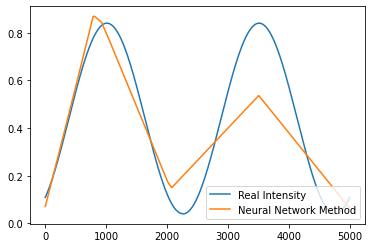

2000 167 3583.010355157209


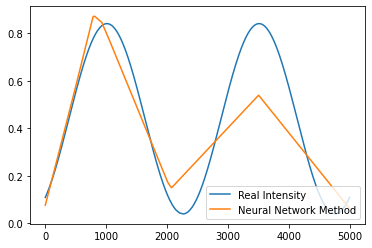

2000 168 3584.4693559028915


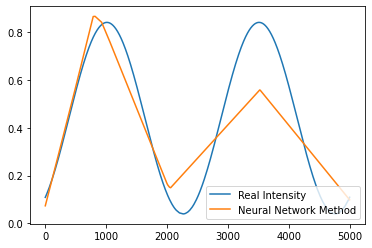

2000 169 3581.2210604103366


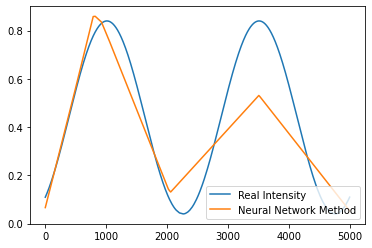

2000 170 3583.049793494786


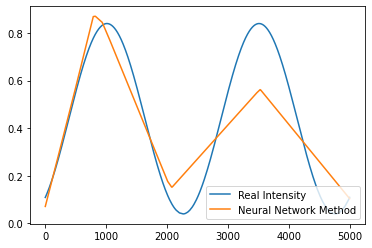

2000 171 3583.110403550758


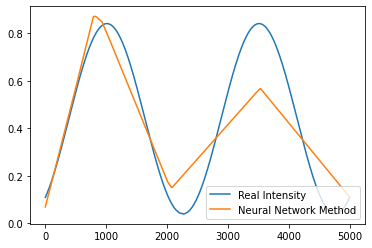

2000 172 3578.028786214167


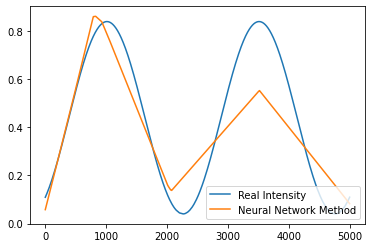

2000 173 3577.2796333416672


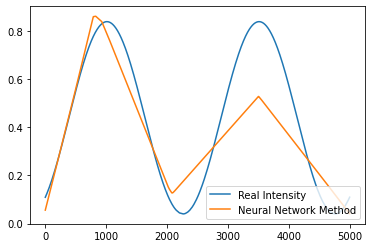

2000 174 3575.8497747807446


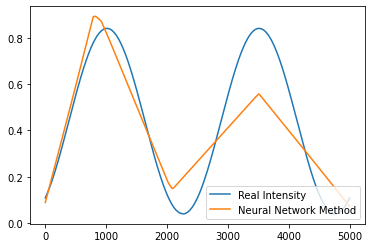

2000 175 3575.787886382307


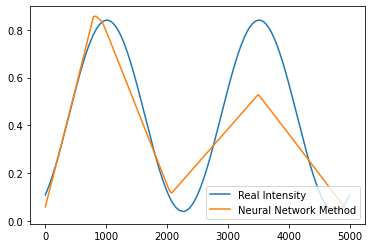

2000 176 3575.2667200864066


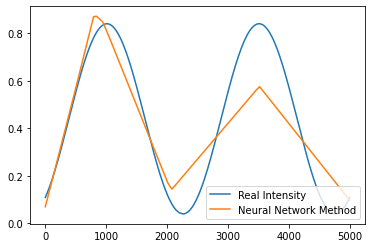

2000 177 3571.8838047969634


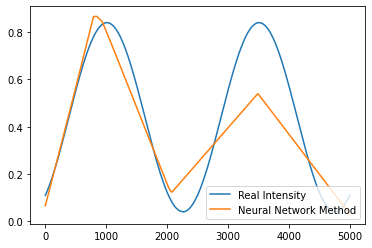

2000 178 3569.232457041431


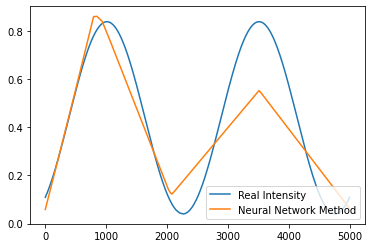

2000 179 3567.835273510877


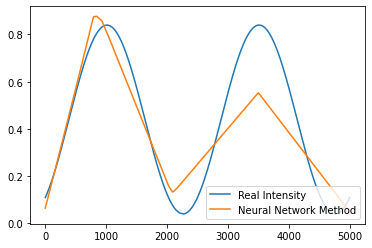

2000 180 3567.2768090369837


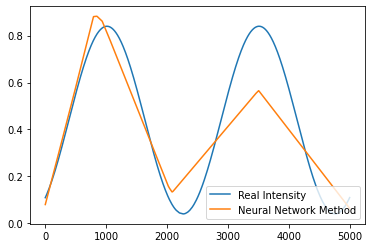

2000 181 3565.918888437491


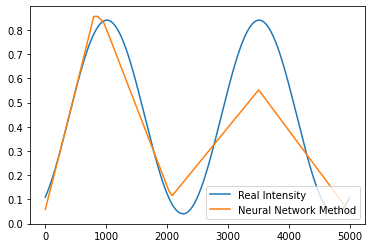

2000 182 3564.2448799747367


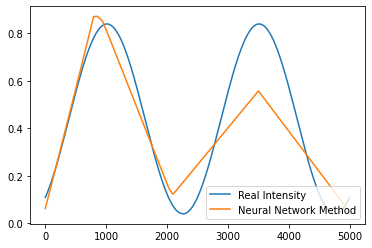

2000 183 3563.5103448539885


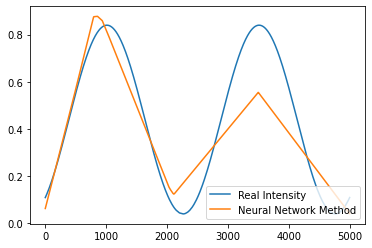

2000 184 3562.131716717052


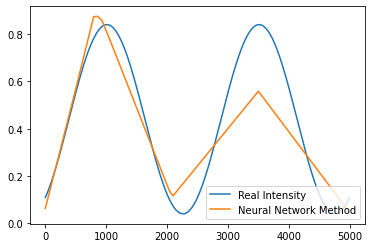

2000 185 3560.9277005965023


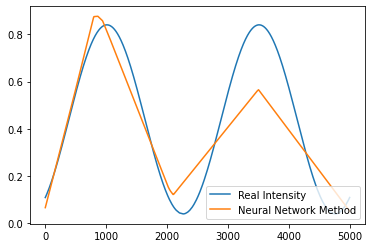

2000 186 3560.5384092913064


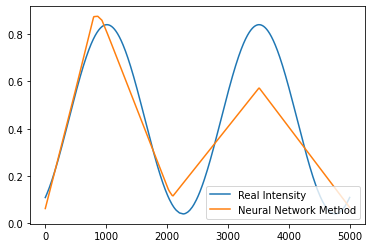

2000 187 3559.2979410645476


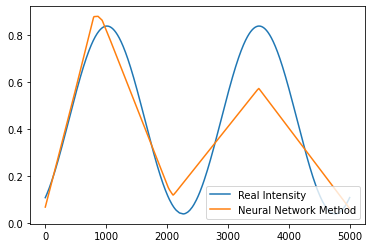

2000 188 3558.1847336023666


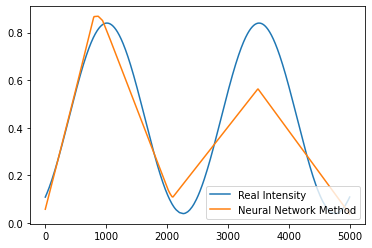

2000 189 3557.361107261944


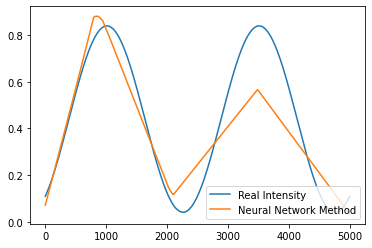

2000 190 3696.1068838652113


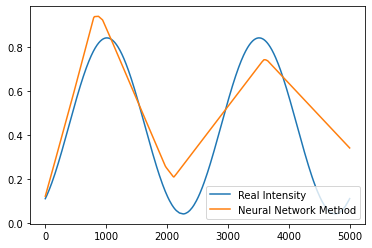

2000 191 3773.808989507939


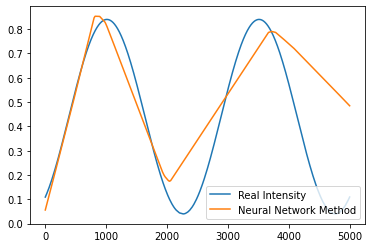

2000 192 3612.787262878735


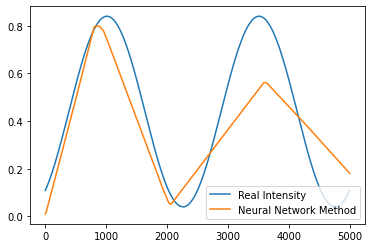

2000 193 3577.3999089108197


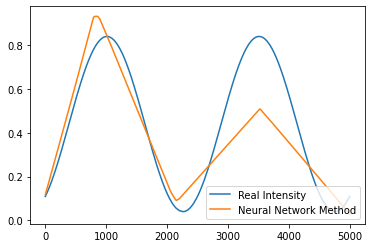

2000 194 3568.3175750668465


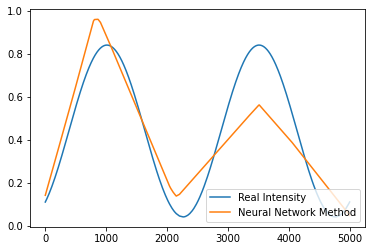

2000 195 3554.1667359391768


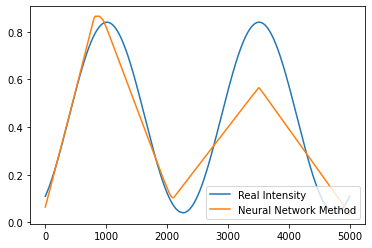

2000 196 3553.0688297162224


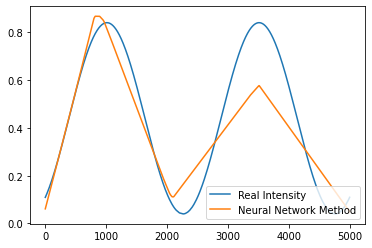

2000 197 3553.6763136990335


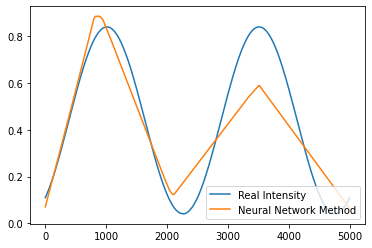

2000 198 3550.9007967283296


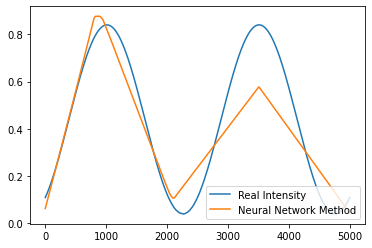

2000 199 3550.0850122097113


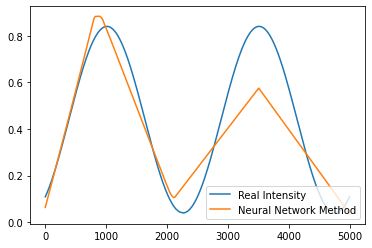

2000 200 3549.7143252560995


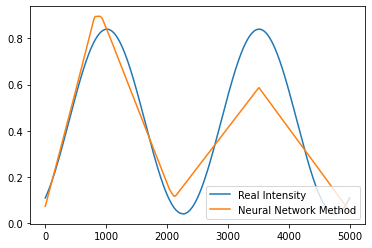

[[array([[-0.04120823],
         [-0.6169205 ],
         [-1.07961425],
         [ 0.18700794],
         [-0.01412334],
         [ 0.04563495],
         [ 0.03712575],
         [ 0.14157484],
         [-0.93616985],
         [ 0.03147539],
         [ 0.23254253],
         [ 0.14314927],
         [ 0.02501466],
         [ 0.11400762],
         [ 0.18770003],
         [ 0.08798119],
         [ 0.1700536 ],
         [ 0.00180885],
         [ 0.06365948],
         [ 0.00576136],
         [-0.01355834],
         [ 0.02581708],
         [ 0.28444153],
         [ 0.05743677],
         [ 0.1512141 ],
         [ 0.32722089],
         [-0.09037088],
         [-0.0130848 ],
         [-0.01513259],
         [-0.74164439],
         [-0.35214593],
         [ 0.00891692],
         [ 0.04126771],
         [ 0.06029282],
         [-1.00028259],
         [ 0.35761581],
         [-1.02651891],
         [ 0.29425221],
         [-0.74131026],
         [ 0.38110005],
         [-0.02584607],
         [ 0.039

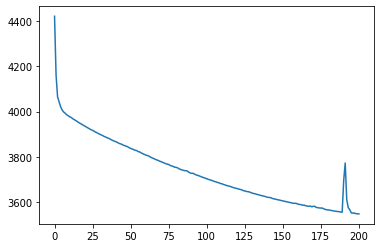

In [25]:

#T=3000
#alpha=0
#beta=2
tseries1=tseriesnew
print(likelihoodMu(tseries1))
tmax=tseries1[-1]
tseries=tseries1

mus1=[]
mus2=[]
musC=[]
mus1grad=[]
mus2grad=[]
musCgrad=[]

dictMus={}
dictIntegrate={}

dictgradient={}
epsilon = 1e-8
def nnIntializeMus(nNeurons1):
    c=np.random.uniform(0,1,1)[0]*0.01
    alphas=(np.random.uniform(0,1,nNeurons1)).reshape(-1,1)*0.2
    alpha0=np.random.uniform(0,1,1)*0.001
    
    betas1=(np.random.uniform(0,1,int(nNeurons1/2)))*0.001
    betas2=(np.random.uniform(-1,0,int(nNeurons1/2)))*0.001
    print(tmax)
    betas=np.concatenate((betas1,betas2))
    betas=(betas).reshape(-1,1)
    
    beta01=(np.random.uniform(-1,0,int(nNeurons1/2)))
    beta02=(np.random.uniform(0,1,int(nNeurons1/2)))
    beta0=(np.concatenate((beta01,beta02)))
    beta0=(beta0).reshape(-1,1)
    
    
    
                                        
    
    #mean=np.mean(tseries)
    #std=np.std(tseries)
    
    #betas=weight_relu.reshape(-1,1)
    #beta0=bias_relu.reshape(-1,1)
    #alphas=weight_exp.reshape(-1,1)
    #alpha0=bias_exp-c
    
    
    betas=betas*len(tseries)/tmax
    #beta0=beta0-betas*mean
    
    mus1.append(alphas)
    mus1.append(alpha0)
    mus2.append(betas)
    mus2.append(beta0)
    musC.append(c)
    
    a1=np.zeros((len(alphas),1))
    a2=0
    mus1grad.append(a1)
    mus1grad.append(a2)
    mus2grad.append(a1)
    mus2grad.append(a1)
    musCgrad.append(0)

    
    return
def nnMufunction(x):
    alphas=mus1[0]
    alpha0=mus1[1]
    betas=mus2[0]
    beta0=mus2[1]
    c=musC[0]
    x=np.array(x)
    x=x.reshape(-1)
    n1=np.maximum(betas*x.reshape(1,-1)+beta0,0)
    n2=np.dot(alphas.T,n1)+alpha0
    y=(np.maximum(n2,0))+c
    return y.reshape(-1)



def outerInflections():
    alphas=mus1[0]
    alpha0=mus1[1]
    betas=mus2[0]
    beta0=mus2[1]
    inflection=[]
    inflectionPs=dictMus['innerinflection']
    infl1=-1000
    for i in range(1,len(inflectionPs)):
        iP1=inflectionPs[i]
        iP2=inflectionPs[i-1]
        n1=betas*(iP1-epsilon)+beta0
        dn1=(n1>0)
        n2=(alphas*dn1*n1).sum()+alpha0
        dn2=(n2>0)
        v1=(alphas*dn1*beta0).sum()
        v2=(alphas*dn1*betas).sum()
        infl=(-alpha0[0]-v1)/v2
        if (infl1!=infl) &(iP1>infl)&(iP2<infl):
            inflection.append(infl)
            infl1=infl
    inflection=np.array(inflection)
    inflection=np.sort(inflection)
    inflection=inflection[inflection<tmax]
    dictMus['outerinflection']=inflection
    
    return 



def inflectionPoints():
    
    dictMus.clear()
 
    den=mus2[0]+epsilon*(mus2[0]==0)
    x=-mus2[1]/mus2[0]
    x=x[x>0]
    x=np.sort(x)
    interestX=np.append(0,x)
    inflectionPs=interestX
    
    inflectionPs=np.sort(inflectionPs)
    inflectionPs=inflectionPs[inflectionPs<tmax]
    dictMus['innerinflection']= inflectionPs
    outerInflections()
    outerInflections1=dictMus['outerinflection']
    inflections=np.concatenate((inflectionPs,outerInflections1))
    inflections=np.sort(inflections)
    dictMus['inflection']=inflections
    
    return



def nnPrecalculatemus():
    dictIntegrate.clear()
    alphas=mus1[0]
    alpha0=mus1[1]
    betas=mus2[0]
    beta0=mus2[1]
    c=musC[0]
    inflectionPs=dictMus['inflection']
    dictIntegrate[0]=0
    Integr1=0
    for j in range(1,len(inflectionPs)):
        iP1=inflectionPs[j]
        iP2=inflectionPs[j-1]
        n1=betas*(iP1-epsilon)+beta0
        dn1=(n1>0)
        n2=(alphas*n1*dn1).sum()+alpha0
        dn2=(n2>0)
        term3=(alphas*iP1*((betas*iP1*0.5)+beta0)*dn1).sum()+alpha0*iP1
        term4=(alphas*iP2*((betas*iP2*0.5)+beta0)*dn1).sum()+alpha0*iP2
        Integr1=Integr1+(term3-term4)*dn2+c*(iP1-iP2)
        dictIntegrate[iP1]=Integr1.sum()
    return
       

def nnIntegratedmus(iArray):
    y=np.zeros(len(iArray))
    nnPrecalculatemus()
    count=0
    for j in np.nditer(iArray):
        tj=tseries[j]
        if tj>0:
            iP=tseries[j-1]
            integral1=nnIntegratedMusPart(tj)
            integral2=nnIntegratedMusPart(iP)
            y[count]=integral1-integral2
        count+=1
    return y
        

    

 
    
def nnIntegratedMusPart(x):
    x=x
    alphas=mus1[0]
    alpha0=mus1[1]
    betas=mus2[0]
    beta0=mus2[1]
    c=musC[0]
    inflectionPs=dictMus['inflection']

    iP=(max(inflectionPs[inflectionPs<=x]))
    previousVal=dictIntegrate.get(iP)
    n1=betas*(x-epsilon)+beta0
    dn1=(n1>0)
    n2=(alphas*n1*dn1).sum()+alpha0
    dn2=(n2>0)

    term3=(alphas*x*((betas*x*0.5)+beta0)*dn1).sum()+alpha0*x
    term4=(alphas*iP*((betas*iP*0.5)+beta0)*dn1).sum()+alpha0*iP
    Integr1=(term3-term4)*dn2+c*(x-iP)+previousVal
    return Integr1
    
def nnLikelihoodmu(iArray,integratedValue=False):

    ll=(nnIntegratedmus(iArray)).sum()
    if integratedValue==True:
        print("integrated Lambda",ll)
    for j in np.nditer(iArray):
        tj=tseries[j]
        if (tj>0):
            kernel=nnMufunction(tj)
            ll=ll-np.log((kernel.sum()))
    return ll
def gradientMus(iArray):
    
    alphas=mus1[0]
    alpha0=mus1[1]
    betas=mus2[0]
    beta0=mus2[1]
    gradA=np.zeros(len(alphas))*0
    gradB=np.zeros(len(alphas))*0
    gradB0=np.zeros(len(alphas))*0
    gradA0=0
    
    delta=1e-3*(abs(mus1[1][0])>=0.001)+(abs(mus1[1][0])/1000)*(abs(mus1[1][0])<0.001)
    mus1[1]=mus1[1]+delta
    inflectionPoints()
    #loss1=nnLikelihoodmu(iArray)
    loss1=likelihoodsample(iArray)
    mus1[1]=mus1[1]-2*delta
    inflectionPoints()
    loss2=nnLikelihoodmu(iArray)
    #loss2=likelihoodsample(iArray)
    mus1[1]=mus1[1]+delta
    gradA0=(loss1-loss2)/(2*delta)
    
    for j in range(len(alphas)):
        delta=1e-3*(abs(mus1[0][j][0])>=0.001)+(abs(mus1[0][j][0])/1000)*(abs(mus1[0][j][0])<0.001)
        mus1[0][j]=mus1[0][j]+delta
        inflectionPoints()
        #loss1=nnLikelihoodmu(iArray)
        loss1=likelihoodsample(iArray)
        mus1[0][j]=mus1[0][j]-2*delta
        inflectionPoints()
        #loss2=nnLikelihoodmu(iArray)
        loss2=likelihoodsample(iArray)
        mus1[0][j]=mus1[0][j]+delta
        gradA[j]=(loss1-loss2)/(2*delta)
        
        delta=1e-3*(abs(mus2[0][j][0])>=0.001)+(abs(mus2[0][j][0])/1000)*(abs(mus2[0][j][0])<0.001)
        mus2[0][j]=mus2[0][j]+delta
        inflectionPoints()
        #loss1=nnLikelihoodmu(iArray)
        loss1=likelihoodsample(iArray)
        mus2[0][j]=mus2[0][j]-2*delta
        inflectionPoints()
        #loss2=nnLikelihoodmu(iArray)
        loss2=likelihoodsample(iArray)
        mus2[0][j]=mus2[0][j]+delta
        gradB[j]=(loss1-loss2)/(2*delta)
        
        delta=1e-3*(abs(mus2[1][j][0])>=0.001)+(abs(mus2[1][j][0])/1000)*(abs(mus2[1][j][0])<0.001)
        mus2[1][j]=mus2[1][j]+delta
        inflectionPoints()
        #loss1=nnLikelihoodmu(iArray)
        loss1=likelihoodsample(iArray)
        mus2[1][j]=mus2[1][j]-2*delta
        inflectionPoints()
        #loss2=nnLikelihoodmu(iArray)
        loss2=likelihoodsample(iArray)
        
        mus2[1][j]=mus2[1][j]+delta
        gradB0[j]=(loss1-loss2)/(2*delta)
        
    length=len(iArray)
    gradA,gradB,gradB0=gradA.reshape(-1),gradB.reshape(-1),gradB0.reshape(-1)
    
    gradA,gradA0,gradB,gradB0=gradA/length,gradA0/length,gradB/length,gradB0/length
    mus1grad[0]=gradA.reshape(-1,1)
    mus1grad[1]=gradA0
    mus2grad[0]=gradB.reshape(-1,1)
    mus2grad[1]=gradB0.reshape(-1,1)
    
    return


def plotMus():
    x=tseries1
 
    y=mufunction(x)
    plt.plot(x,y, label='Real Intensity')
    nn_y=nnMufunction(tseries)
    plt.plot(x,nn_y, label='Neural Network Method')
    plt.legend()
    plt.pause(0.0005)
    
    return

def nnSGDMus(lr_mu,nEpochs):
    lr2_mu=lr_mu*1e-3
    shouldPrint=0
    beta_1 = 0.9
    beta_2 =0.999
    epsilon = 1e-8
    count = 0
    bestll = 1e8
    m_t_A = np.zeros((len(mus1[0]),1))*0
    v_t_A = np.zeros((len(mus1[0]),1))*0
    m_t_A0 = 0
    v_t_A0 = 0
    m_t_B = np.zeros((len(mus1[0]),1))*0
    v_t_B = np.zeros((len(mus1[0]),1))*0
    m_t_B0 = np.zeros((len(mus1[0]),1))*0
    v_t_B0 = np.zeros((len(mus1[0]),1))*0
    m_t_C=0
    v_t_C=0
    optimalParams=[mus1,mus2,musC]
    initmus1=np.array(mus1,dtype=object)
    initmus2 = np.array(mus2,dtype=object)
    likelihoodCurve=[]
    #likelihood=nnLikelihoodmu(np.arange(0,len(tseries),1))
    for j in range(0,nEpochs+1,1):
        rsample= np.random.choice(len(tseries),len(tseries),replace = False)
        for i in range(0,len(rsample),200):
            gradientMus1(rsample[i:i+200])
            #discr_case=[mus1grad[0],mus1grad[1],mus2grad[0],mus2grad[1]]
            #gradientMus1(rsample[i:i+500])
            #symb_case=[mus1grad[0],mus1grad[1],mus2grad[0],mus2grad[1]]
            #likelihood=nnLikelihoodmu(np.arange(0,len(tseries),1))
            #print('Likelihood before is', likelihood)
            count=count+1 
            if(shouldPrint):
                print('Alpha values', mus1[0])
                print('gradient alpha values', mus1grad[0])
            m_t_A = beta_1*m_t_A + (1-beta_1)*mus1grad[0]	#updates the moving averages of the gradient
            v_t_A = beta_2*v_t_A + (1-beta_2)*(mus1grad[0]*mus1grad[0])	#updates the moving averages of the squared gradient
            m_cap_A = m_t_A/(1-(beta_1**count))		#calculates the bias-corrected estimates
            v_cap_A = v_t_A/(1-(beta_2**count))		#calculates the bias-corrected estimates
            mus1[0]= mus1[0]-(lr_mu*m_cap_A)/(np.sqrt(v_cap_A)+epsilon)
            #print('Alpha values', mus1[0]-initmus1[0])
            if(shouldPrint):
                print('Alpha0 values', mus1[1])
                print('gradient alpha0 values', mus1grad[1])
            m_t_A0 = beta_1*m_t_A0 + (1-beta_1)*mus1grad[1]	#updates the moving averages of the gradient
            v_t_A0 = beta_2*v_t_A0 + (1-beta_2)*(mus1grad[1]*mus1grad[1])	#updates the moving averages of the squared gradient
            m_cap_A0 = m_t_A0/(1-(beta_1**count))		#calculates the bias-corrected estimates
            v_cap_A0 = v_t_A0/(1-(beta_2**count))		#calculates the bias-corrected estimates
            mus1[1]= mus1[1]-(lr_mu*m_cap_A0)/(np.sqrt(v_cap_A0)+epsilon)
            #print('Alpha- values', mus1[1]-initmus1[1])
            if(shouldPrint):
                print('Beta values', mus2[0])
                print('gradient values', mus2grad[0])
            m_t_B = beta_1*m_t_B + (1-beta_1)*mus2grad[0]	#updates the moving averages of the gradient
            v_t_B = beta_2*v_t_B + (1-beta_2)*(mus2grad[0]*mus2grad[0])	#updates the moving averages of the squared gradient
            m_cap_B = m_t_B/(1-(beta_1**count))		#calculates the bias-corrected estimates
            v_cap_B = v_t_B/(1-(beta_2**count))		#calculates the bias-corrected estimates
            mus2[0]= mus2[0]-(lr2_mu*m_cap_B)/(np.sqrt(v_cap_B)+epsilon)
            #print('Beta- values', mus2[0]-initmus2[0])
            if(shouldPrint): 
                print('Beta0 values', mus2[1])
                print('gradient0 values', mus2grad[1])
            m_t_B0 = beta_1*m_t_B0 + (1-beta_1)*mus2grad[1]	#updates the moving averages of the gradient
            v_t_B0 = beta_2*v_t_B0 + (1-beta_2)*(mus2grad[1]*mus2grad[1])	#updates the moving averages of the squared gradient
            m_cap_B0 = m_t_B0/(1-(beta_1**count))		#calculates the bias-corrected estimates
            v_cap_B0 = v_t_B0/(1-(beta_2**count))		#calculates the bias-corrected estimates
            mus2[1]= mus2[1]-(lr_mu*0.1*m_cap_B0)/(np.sqrt(v_cap_B0)+epsilon)
            #print('Beta0- values', mus2[1]-initmus2[1])
            
            m_t_C = beta_1*m_t_C + (1-beta_1)*musCgrad[0]	#updates the moving averages of the gradient
            v_t_C = beta_2*v_t_C + (1-beta_2)*(musCgrad[0]*musCgrad[0])	#updates the moving averages of the squared gradient
            m_cap_C = m_t_C/(1-(beta_1**count))		#calculates the bias-corrected estimates
            v_cap_C = v_t_C/(1-(beta_2**count))		#calculates the bias-corrected estimates
            musC[0]= musC[0]-(lr_mu*m_cap_C)/(np.sqrt(v_cap_C)+epsilon)
            musC[0]=max(1e-4,musC[0])
            #print("c value", musC[0])
            
            
            #likelihood=likelihoodsample(np.arange(0,len(tseries),1))
            #print('Likelihood after is', likelihood)
            inflectionPoints()
            #print("alpha",symb_case[0]-discr_case[0])
            #print("betas",symb_case[2]-discr_case[2])
            #print("beta0",symb_case[3]-discr_case[3])
        likelihood=nnLikelihoodmu(np.arange(0,len(tseries),1))
        #likelihood1=likelihoodsample(np.arange(0,len(tseries),1))
        if likelihood<bestll:
            bestll=likelihood
            optimalParams=[mus1,mus2,musC]
        print(i,j,likelihood)
        
        likelihoodCurve.append(likelihood)
        plotMus()
    plt.plot(likelihoodCurve)
    return optimalParams

nnIntializeMus(50)
print("Intialization \n")
plotMus()
inflectionPoints()

#likelihood1=likelihoodsample(np.arange(0,len(tseries),1))
#print(likelihood1)
       
nnSGDMus(0.001,200)


